# **Sat_Geo Integration**

This programme, integrates 'Geospatial LEO' with 'link-budget' to give a true output on traffic and capacity


First, we import the necessary libraries


In [2]:
import os 
import numpy as np
import pandas as pd
import link_budget as lb
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.options.mode.chained_assignment = None

Next we read the 'population.csv' and assign the data to the DataFrame df. Similarly, we read 'uq_results.csv' and assign to df1


In [3]:
df = pd.read_csv("C:/Users/bmwan/Desktop/5.2/Link Budget/population.csv")
df1 = pd.read_csv("C:/Users/bmwan/Desktop/5.2/Link Budget/results/uq_results.csv")

In [4]:
df.columns

Index(['Unnamed: 0.1', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'TYPE_1',
       'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry', 'Unnamed: 0', 'population',
       'population_total_per_county', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'pop_density', 'Scaled Area', 'Unnamed: 18'],
      dtype='object')

This line of code, shows all the columns contained in the newly assigned 'df1' dataframe
 

In [5]:
df1.columns

Index(['Unnamed: 0', 'constellation', 'path_loss', 'antenna_gain',
       'total_losses', 'eirp', 'power_received_user', 'noise_power',
       'signal_to_noise_ratio', 'spectral_efficiency', 'channel_capacity_mbps',
       'single_satellite_capacity_in_Gbps', 'constelation_capacity',
       'capacity_area_GBps', 'cost_model', 'cnr_scenario', 'capex_costs',
       'capex_scenario', 'opex_costs', 'opex_scenario',
       'satellite_launch_cost', 'cost_scenario', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [6]:
df.head(5)

,Unnamed: 0.1,GID_0,NAME_0,GID_1,NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Unnamed: 0,population,population_total_per_county,Unnamed: 13,Unnamed: 14,Unnamed: 15,pop_density,Scaled Area,Unnamed: 18
0,0,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",0,20382.54492,7.897622e+05,NaN,NaN,NaN,73.301641,10774.14021,NaN
1,1,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",1,32307.33594,1.095384e+06,NaN,NaN,NaN,73.301641,10774.14021,NaN
2,2,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",2,20890.99023,2.104624e+06,NaN,NaN,NaN,73.301641,10774.14021,NaN
3,3,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",3,42170.01563,9.675207e+05,NaN,NaN,NaN,73.301641,10774.14021,75395.783840
4,4,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",4,17102.59766,5.100474e+05,NaN,NaN,NaN,73.301641,10774.14021,225.514846


In [7]:
df1.head(5)

,Unnamed: 0,constellation,path_loss,antenna_gain,total_losses,eirp,power_received_user,noise_power,signal_to_noise_ratio,spectral_efficiency,...,cost_scenario,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,0,Starlink,169.861712,36.357796,13.53,66.357796,-82.033916,-86.987529,4.953613,1.647211,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Starlink,169.861712,36.357796,13.53,66.357796,-82.033916,-86.987529,4.953613,1.647211,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Starlink,169.861712,36.357796,13.53,66.357796,-82.033916,-86.987529,4.953613,1.647211,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Starlink,169.861712,36.357796,13.53,66.357796,-82.033916,-86.987529,4.953613,1.647211,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Starlink,169.861712,36.357796,13.53,66.357796,-82.033916,-86.987529,4.953613,1.647211,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This iteration produces the population density from a division of the population by the area

This is just to check whether the values of the csv have been successfully transcribed to the dataframe

## Starlink


First Line specifically locates, isolates and re-assigns back to df1, the columns specified

The second line then selects the maximum value of all entries for Satellite Capacity and that belong to Starlink. Third line, prints that value

In [8]:
df1 = df1[['constellation', 'capacity_area_GBps', 'cost_model']]
max_value = df1.loc[df1['constellation'] == 'Starlink', 'capacity_area_GBps'].max()
max_cost = df1.loc[df1['constellation'] == 'Starlink', 'cost_model'].max()

print ('Max Satellite Capacity per Area Value for a single satellite is', max_value, 'Gbps')
print ('Max Cost is', max_cost)

Max Satellite Capacity per Area Value for a single satellite is 0.505936014 Gbps
Max Cost is 2149590521


Now we assign empty columns (whose titles are seen in the code) for additional entries

In [12]:
df[['capacity_area_GBps', 'capacity_user_Mbps', 'cost_per_user', 'monthly_traffic_GBPs']] = ''
df['capacity_area_GBps'] = df1['capacity_area_GBps']

Since we already have the maximum satellite capacity for Starlink

In this calculation, we have already determined that per unit km_sq the available capacity is 506 mbps. In the subsequent operation, we will see how varying numbers of people in the sq km affects their internet speed.

We now Iterate over the dataframe and fill it in the satellite capacity columns

In [13]:
df['capacity_user_Mbps']= (df1['capacity_area_GBps'] / df['pop_density']) * 1000
df['cost_per_user'] = max_cost/df['population']
df['monthly_traffic_GBPs'] = (df['capacity_user_Mbps'] * (30) * (3600) * (20 / 100)) / 1000     

In [14]:
df.to_csv('starlink_hug.csv')

## OneWeb


In [15]:
df1 = df1[['constellation', 'capacity_area_GBps', 'cost_model']]
max_value = df1.loc[df1['constellation'] == 'OneWeb', 'capacity_area_GBps'].max()
max_cost = df1.loc[df1['constellation'] == 'OneWeb', 'cost_model'].max()

print ('Max Satellite Capacity per Area Value for a single satellite is', max_value, 'Gbps')
print ('Max Cost is', max_cost)

Max Satellite Capacity per Area Value for a single satellite is 0.004065882 Gbps
Max Cost is 1598815124


In [16]:
df[['capacity_area_GBps', 'capacity_user_Mbps', 'cost_per_user', 'monthly_traffic_GBPs']] = ''
df['capacity_area_GBps'] = df1['capacity_area_GBps']

### Loop


In [17]:
df['capacity_user_Mbps']= (df1['capacity_area_GBps'] / df['pop_density']) * 1000
df['cost_per_user'] = max_cost/df['population']
df['monthly_traffic_GBPs'] = (df['capacity_user_Mbps'] * (30) * (3600) * (20 / 100)) / 1000  
        

In [18]:
df.to_csv('oneweb.csv')

## Kuiper


In [19]:
df1 = df1[['constellation', 'capacity_area_GBps', 'cost_model']]
max_value = df1.loc[df1['constellation'] == 'Kuiper', 'capacity_area_GBps'].max()
max_cost = df1.loc[df1['constellation'] == 'Kuiper', 'cost_model'].max()

print ('Max Satellite Capacity per Area Value for a single satellite is', max_value, 'Gbps')
print ('Max Cost is', max_cost)

Max Satellite Capacity per Area Value for a single satellite is 0.25273541 Gbps
Max Cost is 1906943765


In [15]:
df[['capacity_area_GBps', 'capacity_user_Mbps', 'cost_per_user', 'monthly_traffic_GBPs']] = ''
df['capacity_area_GBps'] = df1['capacity_area_GBps']

### Loop

In [16]:
df['capacity_user_Mbps']= (df1['capacity_area_GBps'] / df['pop_density']) * 1000
df['cost_per_user'] = max_cost/df['population']
df['monthly_traffic_GBPs'] = (df['capacity_user_Mbps'] * (30) * (3600) * (20 / 100)) / 1000
        

In [17]:
df.to_csv('kuiper.csv')

### Spatial Representation


# Starlink


Plotting a Map to represent the Integrated Data


First, we import country boundary.

In [13]:
#import our boundaries data
filename = 'regions_1_KEN.shp'
path_in = os.path.join("C:/Users/bmwan/Desktop/5.2/Link Budget/data/processed/KEN/regions/", filename) 
country_boundaries = gpd.read_file(path_in)
country_boundaries.head(20)


,GID_0,NAME_0,GID_1,NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84734 -0.07654, 35.82207 -0.11243..."
1,KEN,Kenya,KEN.2_1,Bomet,County,County,36,KE.BO,"POLYGON ((35.26193 -1.01562, 35.24075 -1.03093..."
2,KEN,Kenya,KEN.3_1,Bungoma,County,County,39,KE.BN,"POLYGON ((34.45476 0.47293, 34.43480 0.46785, ..."
3,KEN,Kenya,KEN.4_1,Busia,County,County,40,KE.BS,"POLYGON ((34.24632 0.31446, 34.23613 0.29631, ..."
4,KEN,Kenya,KEN.5_1,Elgeyo-Marakwet,County,County,28,KE.EM,"POLYGON ((35.58806 0.17453, 35.56753 0.19131, ..."
5,KEN,Kenya,KEN.6_1,Embu,County,County,14,KE.EB,"POLYGON ((37.46395 -0.73364, 37.47382 -0.72407..."
6,KEN,Kenya,KEN.7_1,Garissa,County,County,7,KE.GA,"POLYGON ((40.43329 -1.93512, 40.21291 -2.03973..."
7,KEN,Kenya,KEN.8_1,Homa Bay,County,County,43,KE.HB,"POLYGON ((34.48337 -0.79247, 34.46432 -0.83214..."
8,KEN,Kenya,KEN.9_1,Isiolo,County,County,11,KE.IS,"POLYGON ((38.56964 -0.01509, 38.54852 -0.01971..."
9,KEN,Kenya,KEN.10_1,Kajiado,County,County,34,KE.KJ,"POLYGON ((37.87513 -3.03994, 37.87073 -3.07751..."


We then import the starlink.csv


In [18]:
filename = "C:/Users/bmwan/Desktop/5.2/Link Budget/starlink_hug.csv"
path_in = os.path.join('data', 'processed', 'KEN', filename) 
data = pd.read_csv(path_in)

In [19]:
data.head(10)

,Unnamed: 0,GID_0,NAME_0,GID_1,NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,population,population_total_per_county,pop_density,Scaled Area,capacity_user_Mbps,cost_per_user,capacity_area_GBps,traffic
0,0,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",20382.54492,7.897622e+05,73.301641,10774.14021,6.90211,105462.32230,0.505936,NaN
1,1,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",32307.33594,1.095384e+06,73.301641,10774.14021,6.90211,66535.67861,0.505936,NaN
2,2,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",20890.99023,2.104624e+06,73.301641,10774.14021,6.90211,102895.57830,0.505936,NaN
3,3,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",42170.01563,9.675207e+05,73.301641,10774.14021,6.90211,50974.38284,0.505936,NaN
4,4,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",17102.59766,5.100474e+05,73.301641,10774.14021,6.90211,125687.95480,0.505936,NaN
5,5,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",11426.54492,6.511271e+05,73.301641,10774.14021,6.90211,188122.52840,0.505936,NaN
6,6,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",16339.53613,1.567688e+06,73.301641,10774.14021,6.90211,131557.62220,0.505936,NaN
7,7,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",35110.80078,1.193894e+06,73.301641,10774.14021,6.90211,61223.05596,0.505936,NaN
8,8,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",28275.00977,1.869101e+05,73.301641,10774.14021,6.90211,76024.39534,0.505936,NaN
9,9,KEN,Kenya,KEN.1_1,Baringo,County,County,30,KE.BA,"POLYGON ((35.84733582 -0.07654491, 35.82207108...",30826.59180,1.031927e+06,73.301641,10774.14021,6.90211,69731.69577,0.505936,NaN


We then write a function to plot the data.

First, we'll show the range of each colormap

In [20]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    for ax in axs:
        ax.set_axis_off()

    cmaps[category] = cmap_list

## Capacity

In [21]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 : string
        ISO3 of the country
    
    Return
    ------
    fig : matplotlib Figure
        A map of population distribution.
    """

    plot_color_gradients  = ('Qualitative',
                             ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                             'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                             'tab20c'],
     )
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, right_on = gid_level)
    
    bins = [ 20, 40, 60, 80, 100, 120]

    labels = [ '>20 Gbps'
        '20-40 Gbps', '40-60 Gbps', '60-80 Gbps', 
        '80-100 Gbps', '100-120 Gbps'
    ]
     
    boundaries['bins'] = pd.cut(
        boundaries['capacity'],
        bins=bins,
        labels=labels
    )
    
    sns.set(font_scale=0.9)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    base =  boundaries.plot(
            column='capacity_area_GBps',
            ax=ax,
            cmap='copper',
            linewidth=5            ,
            legend=False,
            antialiased=True
            )
    

    
    n = len(boundaries)
    name = 'Starlink Capacity By Region (n={})'.format(n)
    fig.suptitle(name)

    filename = '3.png'
    folder_out = os.path.join('data', 'processed', iso3)
    if not os.path.exists(folder_out):
        os.makedirs(folder_out)
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out)
    plt.close(fig)

    return fig


In [22]:
plot_population(country_boundaries, data, 'GID_1', 'KEN')       


NameError: name 'country_boundaries' is not defined

## Capacity_user

In [1]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',d
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [ -1, 2, 4, 6, 8, 10, 12, 14, 16]      #define value bins and then labels for each one
          
    
    labels = [  
                 '0-2mbps', '2-4mbps', '4-6mbps', '6-8mbps', 
                 '8-10mbps', '10-12mbps', '12-14mbps', '14-16mbps'
                 '>16mbps'
             ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['capacity_user'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'capacity_user', ax = ax,               #now plot our data using pandas plot
                           cmap = 'copper', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Starlink Capacity per user By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = '4.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out,)   
    plt.close(fig)

    fig
    
    return fig

SyntaxError: invalid syntax (496278458.py, line 31)

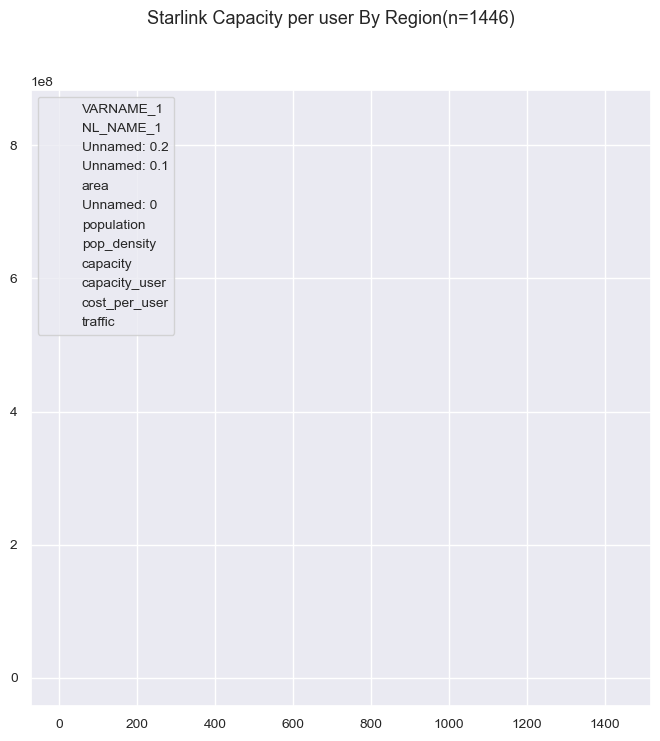

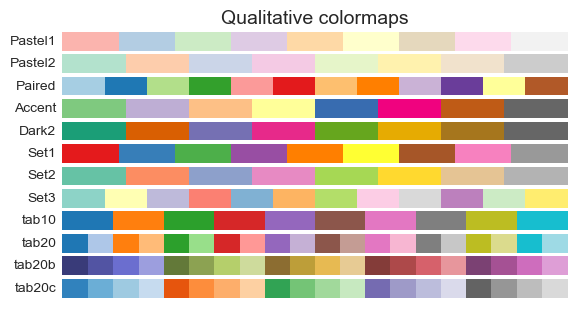

In [24]:
plot_population(country_boundaries, data, 'GID_1', 'KEN')

## Cost per User

In [13]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [ -1, 2, 4, 6, 8, 10, 12, 14, 16]      #define value bins and then labels for each one
          
    
    labels = [  
                 '0-2mbps', '2-4mbps', '4-6mbps', '6-8mbps', 
                 '8-10mbps', '10-12mbps', '12-14mbps', '14-16mbps'
                 '>16mbps'
             ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['cost_per_user'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'cost_per_user', ax = ax,               #now plot our data using pandas plot
                           cmap = 'copper', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Starlink Cost per user By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = 'cost_per_user.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out,)   
    plt.close(fig)

    fig
    
    return fig

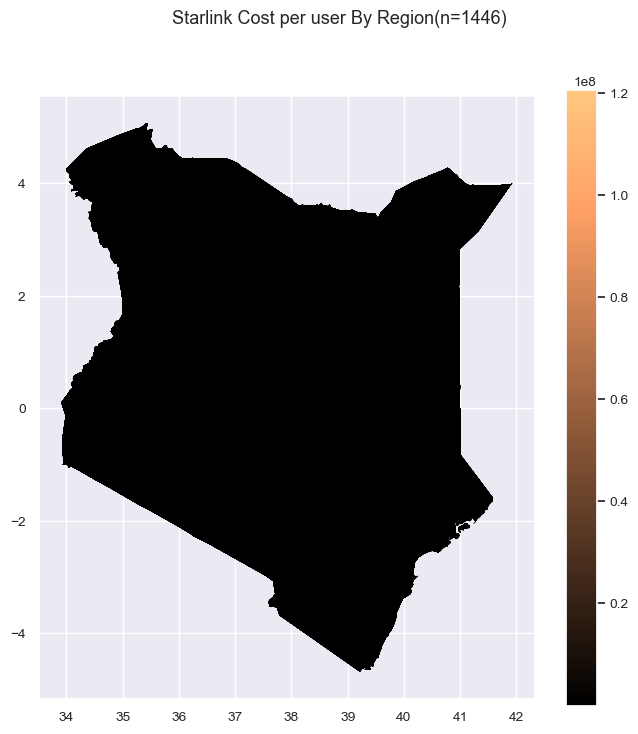

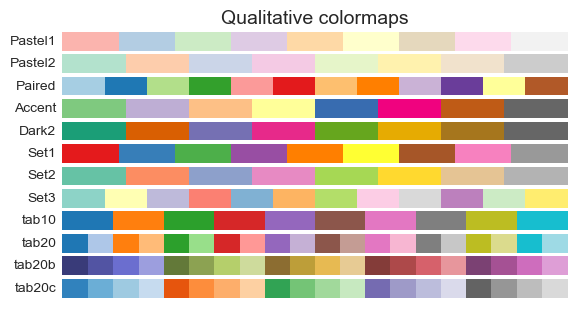

In [14]:
plot_population(country_boundaries, data, 'GID_1', 'KEN')

# Kuiper


In [ ]:
#import our boundaries data
filename = 'regions_1_KEN.shp'
path_in = os.path.join("C:/Users/bmwan/Desktop/5.2/Link Budget/data/processed/KEN/regions/", filename) 
country_boundaries = gpd.read_file(path_in)
country_boundaries.head()


In [ ]:
filename = "C:/Users/bmwan/Desktop/5.2/Link Budget/kuiper.csv"
path_in = os.path.join('data', 'processed', 'KEN', filename) 
data = pd.read_csv(path_in)

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

## Capacity 


In [ ]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [
            -1e6,  10000, 20000, 30000,        #define value bins and then labels for each one ,
            40000,  50000, 60000, 70000 , 80000,
            90000, 100000, 110000, 120000, 130000, 140000,
            150000, 160000, 170000, 180000, 190000, 200000,
            210000, 220000, 230000     # 24 ,
            ]
          
    
    labels = [     '1-10k','10-20k','20-30k', '30-40k',      #23 ,
                '40-50k', '50-60k','60-70k', '70-80k',  
                '80-90k', '90-100k', 
                 '100-110k', '110-120k', '120-130k', '130-140k', 
                 '140-150k', '150-160k', '160-170k', '170-180k', 
                 '180-190k', '190-200k','200-210k', '210-220k', 
                 '>220k' 
                
                ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['capacity'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'capacity', ax = ax,               #now plot our data using pandas plot
                           cmap = 'autumn', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Kuiper Capacity By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = 'Kuiper Capacity.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out)   
    plt.close(fig)

    fig
    
    return fig

## Capacity per User

In [ ]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [ -1, 2, 4, 6, 8, 10, 12, 14, 16]      #define value bins and then labels for each one
          
    
    labels = [  
                 '0-2mbps', '2-4mbps', '4-6mbps', '6-8mbps', 
                 '8-10mbps', '10-12mbps', '12-14mbps', '14-16mbps'
                 '>16mbps'
             ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['capacity_user'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'capacity_user', ax = ax,               #now plot our data using pandas plot
                           cmap = 'RdPu', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Kuiper Capacity per user By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = 'Kuiper Capacity per user.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out,)   
    plt.close(fig)

    fig
    
    return fig

## Cost per User

In [ ]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [ -1, 2, 4, 6, 8, 10, 12, 14, 16]      #define value bins and then labels for each one
          
    
    labels = [  
                 '0-2mbps', '2-4mbps', '4-6mbps', '6-8mbps', 
                 '8-10mbps', '10-12mbps', '12-14mbps', '14-16mbps'
                 '>16mbps'
             ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['cost_per_user'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'cost_per_user', ax = ax,               #now plot our data using pandas plot
                           cmap = 'RdPu', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Kuiper Cost per user By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = 'Kuiper_cost_per_user.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out,)   
    plt.close(fig)

    fig
    
    return fig

# Oneweb


In [ ]:
#import our boundaries data
filename = 'regions_1_KEN.shp'
path_in = os.path.join("C:/Users/bmwan/Desktop/5.2/Link Budget/data/processed/KEN/regions/", filename) 
country_boundaries = gpd.read_file(path_in)
country_boundaries.head()


In [ ]:
filename = "C:/Users/bmwan/Desktop/5.2/Link Budget/oneweb.csv"
path_in = os.path.join('data', 'processed', 'KEN', filename) 
data = pd.read_csv(path_in)

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

## Capacity

In [ ]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [
            -1e6,  10000, 20000, 30000,        #define value bins and then labels for each one ,
            40000,  50000, 60000, 70000 , 80000,
            90000, 100000, 110000, 120000, 130000, 140000,
            150000, 160000, 170000, 180000, 190000, 200000,
            210000, 220000, 230000     # 24 ,
            ]
          
    
    labels = [     '1-10k','10-20k','20-30k', '30-40k',      #23 ,
                '40-50k', '50-60k','60-70k', '70-80k',  
                '80-90k', '90-100k', 
                 '100-110k', '110-120k', '120-130k', '130-140k', 
                 '140-150k', '150-160k', '160-170k', '170-180k', 
                 '180-190k', '190-200k','200-210k', '210-220k', 
                 '>220k' 
                
                ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['capacity'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'capacity', ax = ax,               #now plot our data using pandas plot
                           cmap = 'autumn', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Oneweb Capacity By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = 'Oneweb Capacity.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out)   
    plt.close(fig)

    fig
    
    return fig

## Capacity per User

In [ ]:
def plot_population(country_boundaries, data, gid_level, iso3):
    """
    Plots the country's population at sub-region level.
    
    Parameters
    ----------
    country_boundaries : string
        Name of the country boundary .shp file
    data : string
        Name of the csv file containing the population data
        at sub-regional level
    gid_level : string
        Name of the GID level
    country_iso3 = string
        ISO3 of the country
    
    Return
    ------
    fig : python object
        A map of population distribution. 
    """
    plot_color_gradients( 'Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'] ),( 'Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
                            
    
    boundaries = country_boundaries.merge(data, left_on = gid_level, #merge our population data onto our boundaries
                                  right_on = gid_level)
    
    bins = [ -1, 2, 4, 6, 8, 10, 12, 14, 16]      #define value bins and then labels for each one
          
    
    labels = [  
                 '0-2mbps', '2-4mbps', '4-6mbps', '6-8mbps', 
                 '8-10mbps', '10-12mbps', '12-14mbps', '14-16mbps'
                 '>16mbps'
             ]
     
    boundaries['bins'] = pd.cut(                                   #create a new variable with our bin labels
        boundaries['capacity_user'], 
        bins = bins,
        labels = labels
    )   
    
    sns.set(font_scale = 0.9)                                     #open a new seaborn figure
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    base = boundaries.plot(column = 'capacity_user', ax = ax,               #now plot our data using pandas plot
                           cmap = 'RdPu', linewidth = 0, 
                           legend = True , antialiased = True)
    #allocate a plot title 
    n = len(boundaries)
    name = 'Oneweb Capacity per user By Region(n={})'.format(n)
    fig.suptitle(name)
    
    filename = '4.png'
    folder_out = os.path.join('data', 'processed', iso3)    
    if not os.path.exists(folder_out):  
        os.makedirs(folder_out) 
    path_out = os.path.join(folder_out, filename)
    fig.savefig(path_out,)   
    plt.close(fig)

    fig
    
    return fig

In [17]:
filename = 'gadm_1.shp'
path_boundary = os.path.join('data', 'processed', 'KEN', 'regions', filename)
boundaries = gpd.read_file(path_boundary, crs = 'epsg:4326')
boundaries

,UID,GID_0,ID_0,NAME_0,GID_1,ID_1,NAME_1,VARNAME_1,NL_NAME_1,HASC_1,...,GID_5,ID_5,NAME_5,CC_5,TYPE_5,ENGTYPE_5,REGION,VARREGION,zone,geometry
0,140309,KEN,118.0,Kenya,KEN.1_1,1.0,Baringo,NaN,NaN,KE.BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,139076,KEN,118.0,Kenya,KEN.1_1,1.0,Baringo,NaN,NaN,KE.BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.85098 0.49770, 35.85109 0.49729, ..."
2,139156,KEN,118.0,Kenya,KEN.1_1,1.0,Baringo,NaN,NaN,KE.BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.75417 0.53366, 35.75393 0.53313, ..."
3,139248,KEN,118.0,Kenya,KEN.1_1,1.0,Baringo,NaN,NaN,KE.BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.78914 0.44566, 35.78886 0.44554, ..."
4,139487,KEN,118.0,Kenya,KEN.1_1,1.0,Baringo,NaN,NaN,KE.BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.79961 0.34833, 35.79943 0.34767, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,136997,KEN,118.0,Kenya,KEN.47_1,47.0,West Pokot,NaN,NaN,KE.WP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.56500 1.52998, 35.56509 1.53012, ..."
1442,136883,KEN,118.0,Kenya,KEN.47_1,47.0,West Pokot,NaN,NaN,KE.WP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.54330 1.62346, 35.54320 1.62339, ..."
1443,137144,KEN,118.0,Kenya,KEN.47_1,47.0,West Pokot,NaN,NaN,KE.WP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.34214 1.51081, 35.35437 1.51645, ..."
1444,137105,KEN,118.0,Kenya,KEN.47_1,47.0,West Pokot,NaN,NaN,KE.WP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"POLYGON ((35.15631 1.49415, 35.15616 1.49424, ..."


In [23]:
gdf = boundaries[['NAME_1', 'GID_1', 'geometry']]
gdf['area'] = gdf.geometry.area
gdf.head(5)

NameError: name 'boundaries' is not defined